<a href="https://colab.research.google.com/github/aettikang/bigdata_analysis_basic/blob/main/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 그래프의 한글이 깨질 경우 추가
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [3]:
# 그래프의 한글폰트 보이게 하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [4]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

In [5]:
# csv파일 경로
path = '/content/drive/MyDrive/cuk/빅데이터분석기초/'

In [6]:
import pandas as pd 

ploan = pd.read_csv(path + "Personal Loan.csv")

ploan.head(20) # 데이터 예시 확인
ploan.shape # 데이터 차원 확인

(2500, 13)

In [7]:
feature_columns = list(ploan.columns.difference(["Personal Loan"]))

X = ploan[feature_columns]
y = ploan['Personal Loan'] # 대출여부: 1 or 0

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1234)

In [9]:
import sklearn.preprocessing as preprocessing
preprocessor = preprocessing.Normalizer()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend

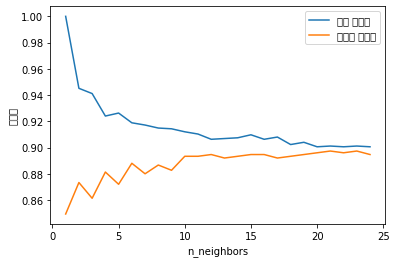

In [10]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# K의 변화량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [11]:
from itertools import compress

neighbors_settings 
best_idx = test_accuracy==max(test_accuracy)

best_n = list(compress(neighbors_settings, best_idx))
print('Best neighbors:',best_n[0])

Best neighbors: 21


In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

best_k = best_n[0]
best_clf = KNeighborsClassifier(n_neighbors=best_k)
best_clf.fit(X_train, y_train)

train_pred_y = best_clf.predict(X_train)
test_pred_y = best_clf.predict(X_test)
tmp_acc = accuracy_score(y_test, test_pred_y)

print( "Best K is {}".format(best_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))

best_knn_conf = confusion_matrix(y_test, test_pred_y)

Best K is 21 , Test acuurcy: 0.8973


In [13]:
print(f'학습 정오행렬 \n{confusion_matrix(y_train, train_pred_y)}')
print(f'테스트 정오행렬 \n{confusion_matrix(y_test, test_pred_y)}\n')
print(f'학습 정확도 : {accuracy_score(y_train, train_pred_y):.4f}')
print(f'테스트 정확도 : {accuracy_score(y_test, test_pred_y):.4f}')

학습 정오행렬 
[[1564    7]
 [ 166   13]]
테스트 정오행렬 
[[670   3]
 [ 74   3]]

학습 정확도 : 0.9011
테스트 정확도 : 0.8973
